In [ ]:
"""
Можна використовувати бібліотеку PIL або бібліотеку openCV.
Створіть функцію для зчитування зображення з диску та його відображення на екрані.
Створіть функцію для збереження зображення на диск.
Створіть функцію для реалізації наступних піксельних операцій:

-зміна контрасності (задання коефіцієнту контрастності та яскравості);
-зміна яскравості (задання коефіцієнту яскравості);
-зміна насиченості (задання коефіцієнту насиченості);
-зміна розміру зображення (задання нової ширини та висоти);
-обізання зображення (задання координат початку та кінця обрізання);
-поворот зображення на заданий кут (задання кута повороту в градусах).
"""

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Функція для зчитування зображення
def load_img(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    return img

In [3]:
# Функція для відображення зображення на екрані
def show(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show

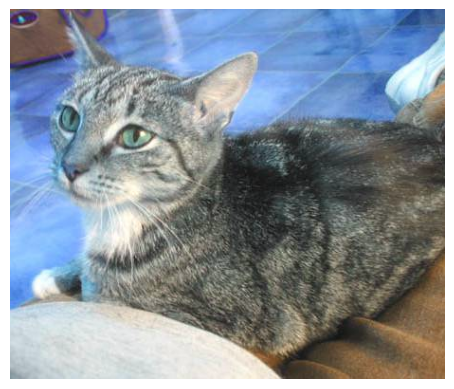

In [7]:
image = load_img('cat.jpg')
show(image)

In [8]:
# Функція запису зображення на диск
def save_file(img):
    cv2.imwrite(file_name, img)

In [15]:
# Зберігаємо файл на диск
os.mkdir('Image')
file_name = 'Image/cat.jpg'
save_file(load_img('cat.jpg'))

In [16]:
# Автоконтраст
def auto_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8)) # CLAHE (Контраст обмеженого адаптивного вирівнювання гістограми)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)                # конвертувати колірний простір BGR у LAB
    l, a, b = cv2.split(lab)                                  # розділити на 3 різні канали
    l2 = clahe.apply(l)                                       # застосувати CLAHE до L-каналу
    lab = cv2.merge((l2,a,b))                                 # об'єднати канали
    return cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)               # конвертувати з LAB в RGB

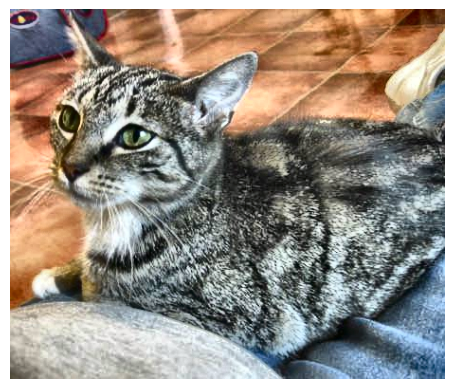

In [20]:
imag_auto_contrast = auto_contrast(load('cat.jpg'))
show(imag_auto_contrast)

file_name = 'Image/imag_auto_contrast.jpg'
save_file(imag_auto_contrast)

In [21]:
# Зміна контрастності (задания коефіцієнту контрастності та яскравості)
def change_contrast(img, alpha, beta):
    # Змінюємо контраст
    new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return new_image
# коефіцієнт контрастності (alpha) та значення яскравості (beta). 
# Коефіцієнт контрастності може бути значенням від 0.0 до будь-якого числа, яке вибирається користувачем, 
# а значення яскравості може бути значенням від 0 до 100, яке вибирається користувачем.

In [22]:
img = load_img('cat.jpg')
image_contr = change_contrast(img, 0.5, 30)

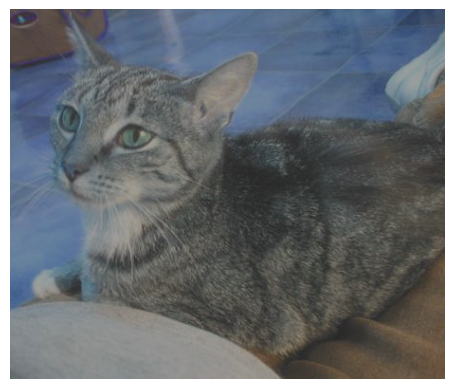

In [23]:
show(image_contr)

In [24]:
file_name = 'Image/image_contrast.jpg'
save_file(image_contr)

In [25]:
# Зміна яскравості (задания коефіцієнту яскравості)
def change_brightness(img, value):
    # Змінюємо яскравість
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v += value
    final_hsv = cv2.merge((h, s, v))
    new_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return new_image

# Значення яскравості може бути значенням від -255 до 255, 
# де значення більше 0 збільшує яскравість, а значення менше 0 зменшує.

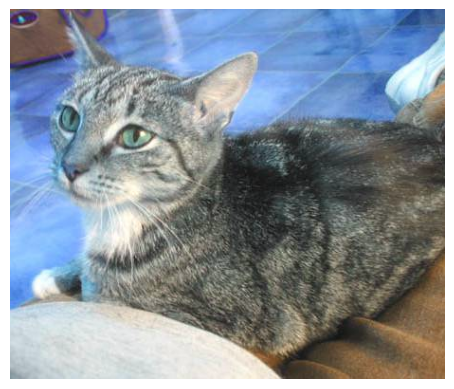

In [28]:
image_brightness = load('cat.jpg')
change_brightness(image_brightness, 250)
show(image_brightness)

In [29]:
file_name = 'Image/image_brightness.jpg'
save_file(image_brightness)

In [30]:
# Зміна насиченості (задания коефіцієнту насиченості)
def change_saturation(img):
    x = 5
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   # Конвертуємо зображення з формату BGR в HSV
    hsv_img[:, :, 1] = hsv_img[:, :, 1] * x          # Збільшуємо / зменшуємо насиченість
    satur = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)  # Перетворюємо зображення з формату HSV в RGB
    return satur

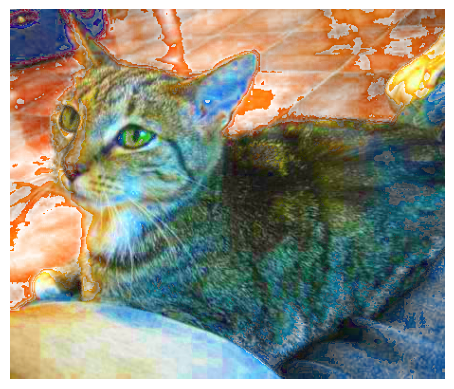

In [31]:
image_saturation = change_saturation(load('cat.jpg'))
show(image_saturation)

In [32]:
file_name = 'Image/image_saturation.jpg'
save_file(image_saturation)

In [33]:
# Зміна розміру зображення (задания нової ширини та висоти)
def resize_image(img, width, height):
    resized_img = cv2.resize(img, (width, height))
    return resized_img

In [35]:
img = load('cat.jpg')
print(f'розмір зображення {img.shape[0]} x {img.shape[1]}')

розмір зображення 390 x 459


In [38]:
image_resized = resize_image(img, 1600, 1200)
print(f'розмір зображення {image_resized.shape[0]} x {image_resized.shape[1]}')

розмір зображення 1200 x 1600


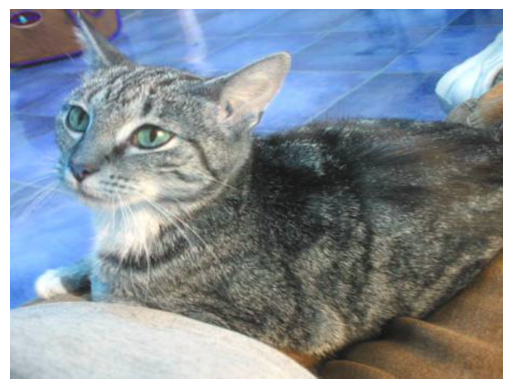

In [39]:
show(image_resized)
file_name = 'Image/image_resized.jpg'
save_file(image_resized)

In [40]:
# Обрізання зображення (задания координат початку та кінця обрізання)
def crop_image(img, x1, y1, x2, y2):
    return img[x1:x2,y1:y2]

In [41]:
img = load('cat.jpg')
img.shape

(390, 459, 3)

In [43]:
img = load_img('cat.jpg')
img_cropped = crop_image(img, 150, 150, 300, 300)
img_cropped.shape

(150, 150, 3)

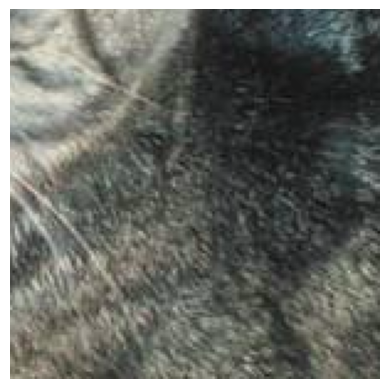

In [44]:
show(img_cropped)

In [45]:
file_name = 'Image/image_cropped.jpg'
save_file(img_cropped)

In [46]:
# Поворот зображення на заданий кут (задания кута повороту в градусах)
def rotate_image(img, angle):
    # Отримуємо висоту та ширину зображення
    (h, w) = img.shape[:2]
    # Обчислюємо центр зображення
    center = (w / 2, h / 2)
    # Обчислюємо матрицю перетворення та повертаємо зображення
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (w, h))
    return rotated_img

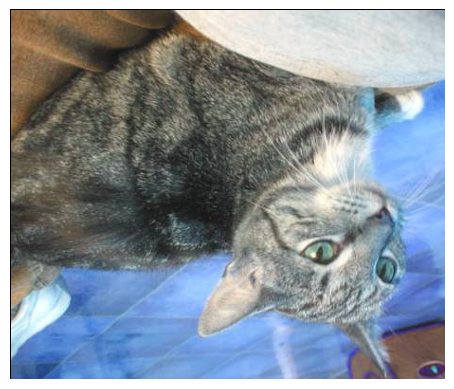

In [47]:
img_rotated = rotate_image(load_img('cat.jpg'), 180)

show(img_rotated)
file_name = 'Image/image_rotated.jpg'
save_file(img_rotated)